# Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 


# Importing Dataset 

In [2]:
df= pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to display stats about the data 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#to displat info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# to display no.of samples on each class 
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

# Preprocessing the data

In [6]:
#check for null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory data Analysis

<AxesSubplot:>

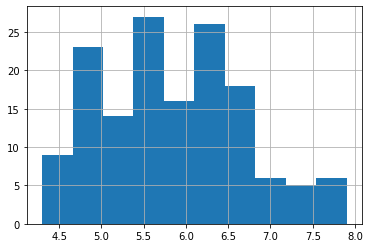

In [7]:
df['sepal_length'].hist()

<AxesSubplot:>

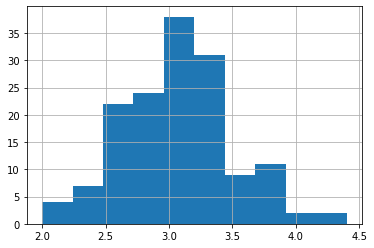

In [8]:
df['sepal_width'].hist()

<AxesSubplot:>

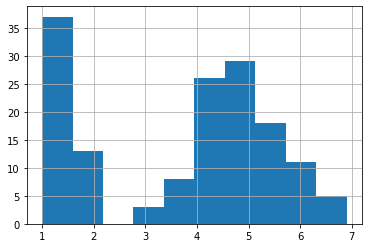

In [9]:
df['petal_length'].hist()

<AxesSubplot:>

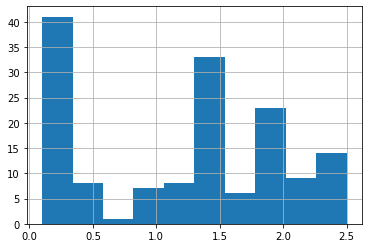

In [10]:
df['petal_width'].hist()

In [11]:
#scatter plots
colors= ['red','orange','blue']
species=['Iris-versicolor','Iris-virginica','Iris-setosa'  ]


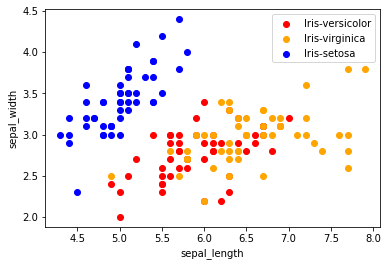

In [12]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

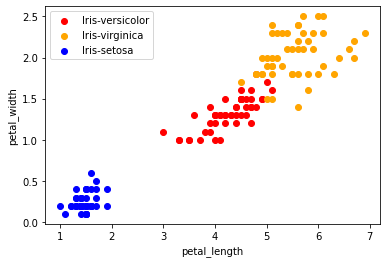

In [13]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

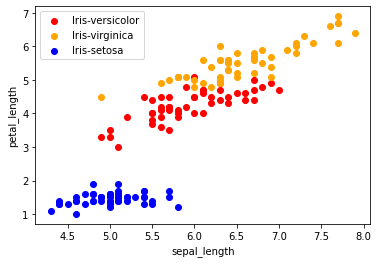

In [14]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

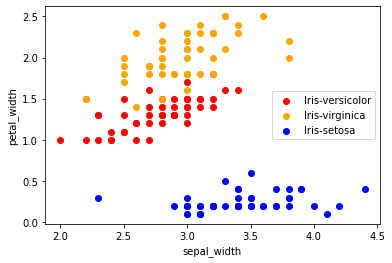

In [15]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

# Correlation

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

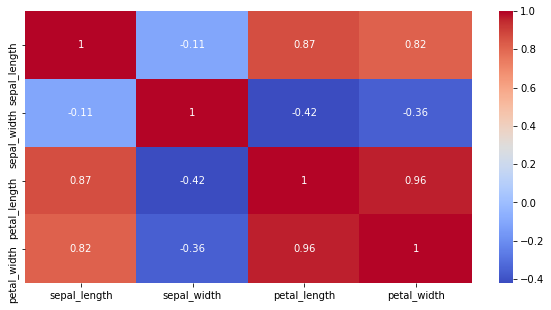

In [17]:
fig,ax= plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,ax=ax,cmap='coolwarm')


# Label Encoder 
label encoder is used to transform  the labels into a numeric form so that the can be read by our ML algorithm 

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [53]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='species')
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [55]:
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
print('Accuracy =', model.score(x_test,y_test)*100)

Accuracy = 96.66666666666667


In [57]:
#lets try another model 
from sklearn.neighbors import KNeighborsClassifier
kN_model= KNeighborsClassifier()

In [58]:
kN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
print('Accuracy =', kN_model.score(x_test,y_test)*100)

Accuracy = 90.0


In [61]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [62]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
print('Accuracy', dt_model.score(x_test,y_test))

Accuracy 0.8666666666666667
